In [ ]:
import random
import string
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter
import math
from itertools import combinations
from pprint import pprint

# B1.1


In [ ]:
# ---- Fitness --> Shows how many chars in the individual string match target string
# These are the same for each part.
def fitness(individual):
    return sum(1 for a, b in zip(individual, target) if a == b)


# ---- Population initialization --> Creates the initial population of size N combined with target strings
def init_population():
    return [''.join(random.choice(alphabet) for _ in range(L)) for _ in range(N)]


# ---- Tournament Selection --> From the population selects one parent using tournament selection. Using randomly picked K individuals and best fitness
def tournament_selection(pop, fits, K):
  selected = random.sample(list(zip(pop,fits)), K)
  return max(selected, key=lambda x: x[1])[0]


# ---- Crossover --> Doing one-point crossover between two parents, which then returns the two children
def crossover(parent_1, parent_2):
  point = random.randint(1, L - 1)
  child1 = parent_1[:point] + parent_2[point:]
  child2 = parent_2[:point] + parent_1[point:]
  return child1, child2


# ---- Mutation --> Randomly changing each character with prob mu (as defined previously, e.g. 1/L)
def mutate(individual, mu):
  return ''.join(c if random.random() > mu else random.choice(alphabet) for c in individual)


# ---- RUN_GA --> This is the main Genetic algorithm, it runs once and then returns the number of generations to get to the target string (or Gmax if its not found)
# This one is slightly different for each part and will therefore be redefined at each new section.
def run_ga(mu, K):
  population = init_population()
  for generation in range(1, Gmax+1):
    fitnesses = [fitness(ind) for ind in population]


    if target in population: # checks if the target is in the population
      return generation # target found and returns it

    new_population = []

    # Create N new individuals (N/2 pairs of children from the crossover)
    for _ in range(N // 2):
      p1 = tournament_selection(population, fitnesses, K )
      p2 = tournament_selection(population, fitnesses, K )
      c1,c2 = crossover(p1,p2)

      new_population.append(mutate(c1,mu))
      new_population.append(mutate(c2,mu))

    population = new_population
  return Gmax # For when the target was not found, it returns the max amount of generations possible

In [ ]:
# Predefined in Task description
L = 15 # Length of the target string
N = 200 #Population size
K = 2
mu = 1 / L # Mutation rate
Gmax = 100 # Maximum amount of generations per run
alphabet = string.ascii_letters  # alphabet containing 26 lowercase + 26 uppercase

# ---- Target String generation --> Generates a random target string based on the Length (L)
target = ''.join(random.choice(alphabet) for _ in range(L)) # Setting a random generated target string of length (L), in this case 15
# target = 'sunflowerseedzz'
print("Target string:", target)

# --- Task 1 --> run GA 10 times and return the generation for which the target was found
results = []
for i in range(10):
  t = run_ga(mu,K)
  print(f"Run {i+1}: target_finish = {t} generations")
  results.append(t)

Target string: baQTSYYKSgpwAIt
Run 1: target_finish = 60 generations
Run 2: target_finish = 44 generations
Run 3: target_finish = 46 generations
Run 4: target_finish = 52 generations
Run 5: target_finish = 38 generations
Run 6: target_finish = 59 generations
Run 7: target_finish = 74 generations
Run 8: target_finish = 56 generations
Run 9: target_finish = 44 generations
Run 10: target_finish = 75 generations


# B1.2


Target string: gedKTdvXpcTiRbl
running the experiment using mu = 0
Run 1: target_finish = 100 generations
Run 2: target_finish = 100 generations
Run 3: target_finish = 100 generations
Run 4: target_finish = 100 generations
Run 5: target_finish = 100 generations
Run 6: target_finish = 100 generations
Run 7: target_finish = 100 generations
Run 8: target_finish = 100 generations
Run 9: target_finish = 25 generations
Run 10: target_finish = 100 generations
running the experiment using mu = 1/L
Run 1: target_finish = 51 generations
Run 2: target_finish = 57 generations
Run 3: target_finish = 67 generations
Run 4: target_finish = 54 generations
Run 5: target_finish = 48 generations
Run 6: target_finish = 50 generations
Run 7: target_finish = 60 generations
Run 8: target_finish = 43 generations
Run 9: target_finish = 83 generations
Run 10: target_finish = 63 generations
running the experiment using mu = 3 / L
Run 1: target_finish = 100 generations
Run 2: target_finish = 100 generations
Run 3:

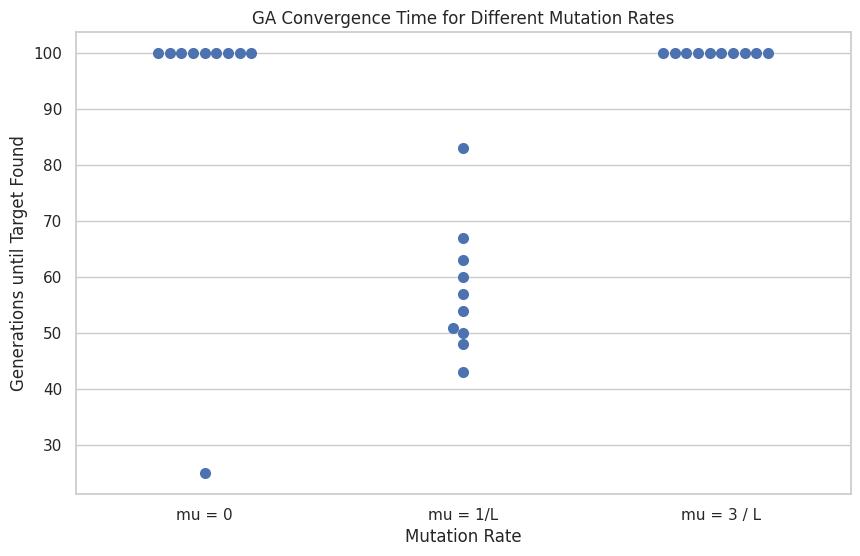

In [ ]:
# Predefined in Task description
L = 15 # Length of the target string
N = 200 #Population size
K = 2
Gmax = 100 # Maximum amount of generations per run
alphabet = string.ascii_letters  # alphabet containing 26 lowercase + 26 uppercase

# ---- Target String generation --> Generates a random target string based on the Length (L)
target = ''.join(random.choice(alphabet) for _ in range(L)) # Setting a random generated target string of length (L), in this case 15
print("Target string:", target)

# ---- Running task B1.2, basically the same as B1.1, however now with mu = 0, mu = 3/L.

# new mu values to try instead of 1 / L, Please Note I added the 1/L since I thought it didnt work, and I know 1 / L actually works
mu_task2 = {
    "mu = 0": 0,
    "mu = 1/L": 1/L,
    "mu = 3 / L": 3 / L
}

results = []

for label, mu in mu_task2.items():
  #print(label,"--", mu)
  print(f"running the experiment using {label}")
  for i in range(10):
    t = run_ga(mu , K)
    print(f"Run {i+1}: target_finish = {t} generations")
    results.append({'Mutation Rate': label, 'Generations': t})

# Observations: With a specific target string using mu = 0, or mu = 3 / L we see that the target is never found in the 10 runs within the Gmax amount.
# When adding 1 / L to the mu_values, we see that this problem is to do with the mu values, and not the code.
# When running the code a couple of trials, we see that very sparsely the other mu values can find the target in a lower amount of generations than Gmax.
# However, it seems this only happens very sparsely to mu = 0, and not mu = 3 / L
# mu = 0 finds it very rarely, but fast (if it does), and mu = 3/L never finds it (atleast in 10 runs)

# ---- Visualising the results from task B1.2
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

results_df = pd.DataFrame(results) # Convert the results list to a DataFrame

sns.swarmplot(x='Mutation Rate', y='Generations', data=results_df, size=8)
plt.title("GA Convergence Time for Different Mutation Rates")
plt.xlabel("Mutation Rate")
plt.ylabel("Generations until Target Found")
plt.show()

# B1.3


In [ ]:
# ======= The same functions used as in task 3.1 and 3.2 ======= #
# ---- Introducing Diversity --> We use Hamming distance (explained in Appendix) and Shannon entropy per position.

# ---- Hamming distance between 2 string, so the number of positions at which two strings differ.
def hamming_distances(string1, string2):
  return sum(c1 != c2 for c1, c2 in zip(string1, string2))

# ---- Estimates the diversity in the population
def mean_pairwise_hammingdistance(population):
  pairs = list(combinations(population, 2)) # " Combinations" basically computes all possible combinations of X, with a combination size of Y. So in this case a combination of size 2, from sample data
  distances = [hamming_distances(a,b) for a, b in pairs]
  return np.mean(distances) if distances else 0

# ---- Shannon Entropy --> this calculates the shannon entropy at each string position across the population.
# ---- High entropy = more variety at that specific position, low entropy = convergence
def Shannon_Entropy(population):
  entropies = []
  for i in range(L):
    counts = Counter(individual[i] for individual in population)
    total = len(population)
    probabilities = [count / total for count in counts.values()]
    entropy_value = -sum(p * math.log2(p) for p in probabilities if p>0)
    entropies.append(entropy_value)
  return entropies



# ---- RUN_GA --> This is the main Genetic algorithm, it runs once and then returns the number of generations to get to the target string (or Gmax if its not found)
# ---- Basically the same, however modified to work with the newly added diversity from Hamming distance and shannon entropy
def run_ga_div(mu, K):
  population = init_population()
  diversity_log = []

  for generation in range(1, Gmax+1):
    fitnesses = [fitness(ind) for ind in population]

    # logging population diversity at every 'tracking amount (For this task 10)' generation.
    if generation % track_amount == 0:
      diversity = mean_pairwise_hammingdistance(population)
      diversity_log.append((generation, diversity))

    if target in population: # checks if the target is in the population
      entropy = Shannon_Entropy(population)
      return generation, diversity_log, entropy, True # target found and return


    new_population = []

    # Create N new individuals (N/2 pairs of children from the crossover)
    for _ in range(N // 2):
      p1 = tournament_selection(population, fitnesses, K )
      p2 = tournament_selection(population, fitnesses, K )
      c1,c2 = crossover(p1,p2)

      new_population.append(mutate(c1,mu))
      new_population.append(mutate(c2,mu))

    population = new_population

  # For when target not found
  entropy = Shannon_Entropy(population)
  diversity = mean_pairwise_hammingdistance(population)
  diversity_log.append((Gmax, diversity))
  return Gmax, diversity_log, entropy, False  # Returning Gmax for if target not found, diversity log and the entropy at the ending



In [ ]:
# ---- Task B1.3 ---- #

# Predefined in Task description
L = 15 # Length of the target string
N = 200 #Population size
K = 2
Gmax = 100 # Maximum amount of generations per run
alphabet = string.ascii_letters  # alphabet containing 26 lowercase + 26 uppercase
track_amount = 10 # this is used to track the diversity every X generations

# ---- Target String generation --> Generates a random target string based on the Length (L)
target = ''.join(random.choice(alphabet) for _ in range(L)) # Setting a random generated target string of length (L), in this case 15
print("Target string:", target)

Target string: nfADkBUBAfDfixo


In [ ]:
# ---- Running task B1.3, same as B1.1/2, however now with hamming distance and shannon entropy introduced

mu_values = {
    'mu = 0': 0,
    'mu = 1/L': 1 / L,
    'mu = 3 / L': 3 / L
}

results = []

print(f"Target string: {target}")

for label, mu in mu_values.items():
    print(f"\nrunning task 3.3 with {label}")
    for i in range(10):
        tfinish, div_log, entropy_final, found = run_ga_div(mu, K)
        print(f"Run {i+1}: tfinish = {tfinish}, found = {found}")

        results.append({
            'Mutation Rate': label,
            'Run': i+1,
            'tfinish': tfinish,
            'found': found,
            'diversity_log': div_log,
            'final_entropy': entropy_final
        })

# Summarized pretty output
def print_results_summary(results, mu_values):
    for mu_label in mu_values:
        print(f"\n===== Summary for {mu_label} =====")
        mu_runs = [r for r in results if r['Mutation Rate'] == mu_label]

        # Getting average tfinish, the succest rate.
        avg_tfinish = sum(r['tfinish'] for r in mu_runs) / len(mu_runs)
        success_rate = sum(r['found'] for r in mu_runs) / len(mu_runs)
        print(f"\nAvg generations until target: {avg_tfinish:.2f}")
        print(f"Success rate: {success_rate * 100:.1f}%")

        # Diversity tracking
        diversity_dict = {}
        for run in mu_runs:
            for gen, val in run['diversity_log']:
                if gen not in diversity_dict:
                    diversity_dict[gen] = []
                diversity_dict[gen].append(val)

        print("\nAverage diversity (Hamming distance) over generations:")
        for gen in sorted(diversity_dict):
            avg_div = sum(diversity_dict[gen]) / len(diversity_dict[gen])
            print(f"  Gen {gen:>3}: Hamming distance = {avg_div:.2f}")

        # Average entropy
        entropy_vals = np.array([r['final_entropy'] for r in mu_runs])
        avg_entropy = np.mean(entropy_vals, axis=0)
        entropy_rounded = [round(float(e), 2) for e in avg_entropy]

        print("\nAverage final entropy per position:")
        print(entropy_rounded)

print_results_summary(results, mu_values)


# Task B1.4 Questions:
# ==== PERFORMANCE ==== #
# mu = 0 -> Without mutation, the algorithm struggles to explore, gets stuck in local optima, and rarely finds target
# mu = 1/L -> Optimal setting, moderate mutation allows for good exploration, balanced exploitation/exploration trade-off.
# mu = 3/L -> Never converges because of high mutation. Constantly changing population, so never settles on a good solution.

# ==== Diversity ==== #
# mu = 0 -> low diversity, it starts really high, but quickly drops to ~1. Meaning that the population quickly loses variation, and it gets stuck in suboptimal solutions.
# mu = 1/L -> Controlled diversity, starts high and gradually decreases, but stays moderately high ~6. Showing a good level of variation, which allows for steady progress without stagnation.
# mu = 3/L -> Uncontrolled, starts really high and stays really high. Which shows that the algorithm never settles on a good solution. Exploration > exploitation

# ==== Entropy ==== #
# mu = 0 -> Mostly zeros, shows lack of variation. The population is nearly identical so it cant adapt well
# mu = 1/L -> Moderate entropy values, so the algorithm maintains variation, which could lead to better search efficiency.
# mu = 3/L -> High entropy across the board, the population is too random which makes covergence not possible.

Target string: nfADkBUBAfDfixo

running task 3.3 with mu = 0
Run 1: tfinish = 100, found = False
Run 2: tfinish = 100, found = False
Run 3: tfinish = 100, found = False
Run 4: tfinish = 24, found = True
Run 5: tfinish = 100, found = False
Run 6: tfinish = 100, found = False
Run 7: tfinish = 100, found = False
Run 8: tfinish = 100, found = False
Run 9: tfinish = 100, found = False
Run 10: tfinish = 100, found = False

running task 3.3 with mu = 1/L
Run 1: tfinish = 50, found = True
Run 2: tfinish = 50, found = True
Run 3: tfinish = 61, found = True
Run 4: tfinish = 61, found = True
Run 5: tfinish = 42, found = True
Run 6: tfinish = 43, found = True
Run 7: tfinish = 35, found = True
Run 8: tfinish = 62, found = True
Run 9: tfinish = 88, found = True
Run 10: tfinish = 46, found = True

running task 3.3 with mu = 3 / L
Run 1: tfinish = 100, found = False
Run 2: tfinish = 100, found = False
Run 3: tfinish = 100, found = False
Run 4: tfinish = 100, found = False
Run 5: tfinish = 100, found =

# B1.5


Target string: dPmiBVZHnspOafp


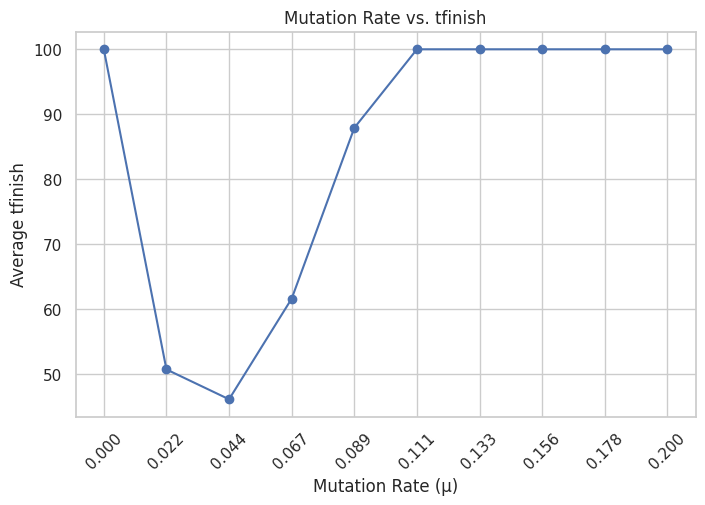

In [ ]:
# ---- Task B1.5 ---- #

# Predefined in Task description
L = 15 # Length of the target string
N = 200 #Population size
K = 2
Gmax = 100 # Maximum amount of generations per run
alphabet = string.ascii_letters  # alphabet containing 26 lowercase + 26 uppercase

# ---- Target String generation --> Generates a random target string based on the Length (L)
target = ''.join(random.choice(alphabet) for _ in range(L)) # Setting a random generated target string of length (L), in this case 15
print("Target string:", target)


# ---- RUN_GA --> This is the main Genetic algorithm, it runs once and then returns the number of generations to get to the target string (or Gmax if its not found)
def run_ga(mu, K):
  population = init_population()
  for generation in range(1, Gmax+1):
    fitnesses = [fitness(ind) for ind in population]


    if target in population: # checks if the target is in the population
      return generation # target found and returns it

    new_population = []

    # Create N new individuals (N/2 pairs of children from the crossover)
    for _ in range(N // 2):
      p1 = tournament_selection(population, fitnesses, K )
      p2 = tournament_selection(population, fitnesses, K )
      c1,c2 = crossover(p1,p2)

      new_population.append(mutate(c1,mu))
      new_population.append(mutate(c2,mu))

    population = new_population
  return Gmax # For when the target was not found, it returns the max amount of generations possible


# ---- Running task B1.5

# Task description states to use 10 gradually increasing values for mu, so I used a linspace from 0 to 3/L, since previous assignments showed that 3/L does find target.
mu_task5 = np.linspace(0, 3/L, 10)
mu_labels5 = [f"{mu:.3f}" for mu in mu_task5]

avg_tfinish = []

for mu in mu_task5:
  tfinish_list = []
  for i in range(10):
    t= run_ga(mu , K)
    tfinish_list.append(t)
  avg_tfinish.append(np.mean(tfinish_list))

# ---- Visualising the results from task B1.5
# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(mu_task5, avg_tfinish, marker='o', linestyle='-')
plt.xlabel("Mutation Rate (µ)")
plt.ylabel("Average tfinish")
plt.title("Mutation Rate vs. tfinish")
plt.xticks(mu_task5, mu_labels5, rotation=45)  # Set formatted labels
plt.grid(True)
plt.show()

# OPTIMAL MU is around 0.022/0.044. Around 0.05 works best with K = 2

# B1.6

Target string: MiUTDOCtOxMfBNC


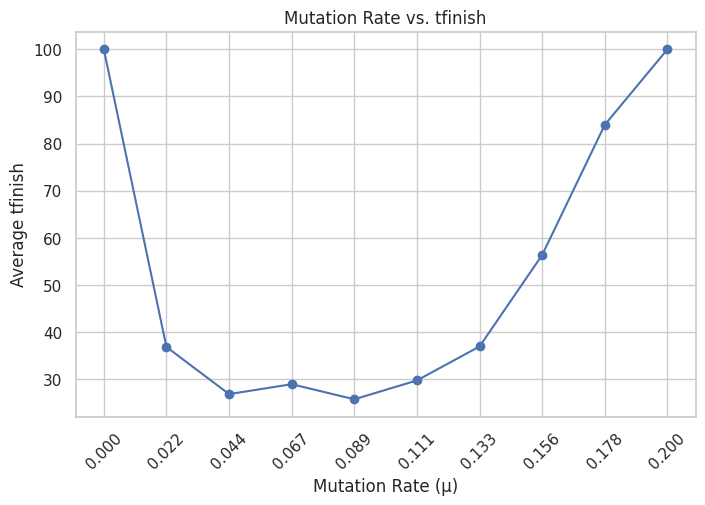

In [ ]:
# ---- Task B1.6 ---- #

# Predefined in Task description
L = 15 # Length of the target string
N = 200 #Population size
K = 5 # K is set to 5 for this task
Gmax = 100 # Maximum amount of generations per run
alphabet = string.ascii_letters  # alphabet containing 26 lowercase + 26 uppercase

# ---- Target String generation --> Generates a random target string based on the Length (L)
target = ''.join(random.choice(alphabet) for _ in range(L)) # Setting a random generated target string of length (L), in this case 15
print("Target string:", target)

# ---- Running task B1.6

# Task description states to use 10 gradually increasing values for mu, so I used a linspace from 0 to 3/L, since previous assignments showed that 3/L does find target.
mu_task5 = np.linspace(0, 3/L, 10)
mu_labels5 = [f"{mu:.3f}" for mu in mu_task5]

avg_tfinish = []

for mu in mu_task5:
  tfinish_list = []
  for i in range(10):
    t= run_ga(mu , K)
    tfinish_list.append(t)
  avg_tfinish.append(np.mean(tfinish_list))

# ---- Visualising the results from task B1.6
# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(mu_task5, avg_tfinish, marker='o', linestyle='-')
plt.xlabel("Mutation Rate (µ)")
plt.ylabel("Average tfinish")
plt.title("Mutation Rate vs. tfinish")
plt.xticks(mu_task5, mu_labels5, rotation=45)  # Set formatted labels
plt.grid(True)
plt.show()

# Higher K value, such as 2 -> 5 increases selection pressure. So individuals with higher fitness are more likely to reproduce. This accelerates convergence
# The overall tfinish is lower than with K=2, meaning that the algorithm converges faster. The optimal mutation rate is more wide and more values can be optimal. However ....
# The negative effects of a high mutation rate are more severe -> steeper increase in tfinish when we leave the optimal point.